# IBM Advanced SQL for Data Engineers (Honors)
# Final Project: Advanced SQL Techniques (Views, Transactions, Stored Procedures, and Joins)

Karim!!! what you need to do is to clean the sql files and get only the sql syntax without any additions and clean this note

In [ ]:
import sqlite3

In [ ]:
# Uncomment and run this command to install ipython-sql, if you don't have it installed locally
#!pip install ipython-sql

In [ ]:
# Load sql extention
%load_ext sql

In [ ]:
# create and connect to the database
%sql sqlite:///chicago.db

In [ ]:
# Get the content of the sql files as strings
with open('chicago_socioeconomic_data.sql', 'r') as f:
    sql_commands1 = f.read()
with open('chicago_public_schools.sql', 'r') as f:
    sql_commands2 = f.read()
with open('chicago_crime.sql', 'r') as f:
    sql_commands3 = f.read()

Run the content of files as sql scripts (creating and populating the tables with data)

In [ ]:
%%sql
{sql_commands1}
{sql_commands2}
{sql_commands3}

In [ ]:
# Showing and conferming the creation of tables
%sql select * from sqlite_master where type='table'

### Part 1: Using Joins
You have been asked to produce some reports about the communities and crimes in the Chicago area. You will need to use SQL join queries to access the data stored across multiple tables.

#### Question 1
Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.

In [ ]:
%%sql
SELECT CPS.NAME_OF_SCHOOL, CPS.COMMUNITY_AREA_NAME, CPS.AVERAGE_STUDENT_ATTENDANCE, CPS.Average_Teacher_Attendance
FROM chicago_public_schools CPS
INNER JOIN chicago_socioeconomic_data CSD
ON CPS.COMMUNITY_AREA_NUMBER = CSD.COMMUNITY_AREA_NUMBER
WHERE CSD.HARDSHIP_INDEX = 98

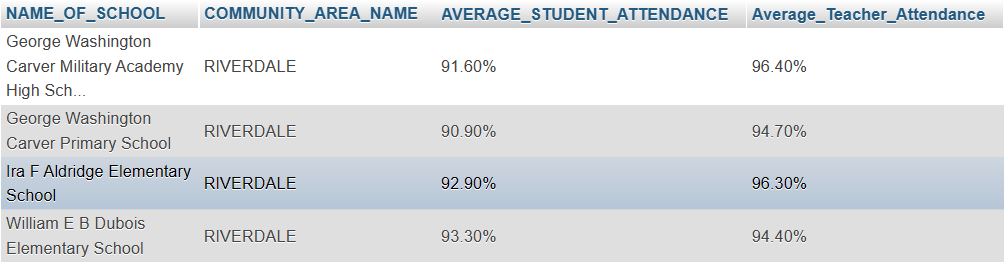

#### Question 2
Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.

In [ ]:
%%sql
SELECT CC.ID, CC.CASE_NUMBER, CC.PRIMARY_TYPE, CSD.COMMUNITY_AREA_NAME
FROM chicago_crime CC
INNER JOIN chicago_socioeconomic_data CSD
ON CC.COMMUNITY_AREA_NUMBER = CSD.COMMUNITY_AREA_NUMBER
WHERE CC.LOCATION_DESCRIPTION LIKE '%SCHOOL%'

The order of the result set might not be the same, this due to the data not having a primary key or an ordered ID to be sorted by, but the entries are the same

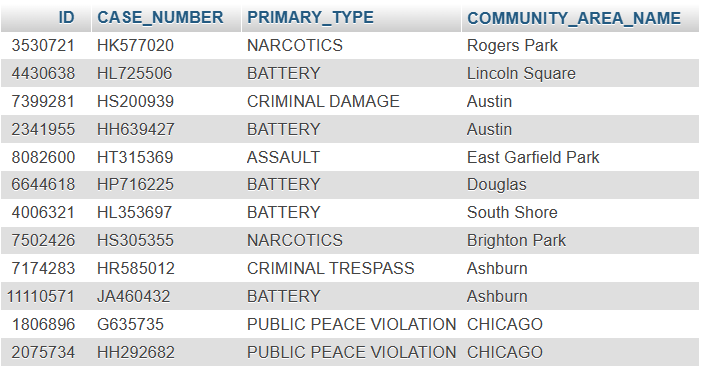

### Exercise 2: Creating a View
For privacy reasons, you have been asked to create a view that enables users to select just the school name and the icon fields from the CHICAGO_PUBLIC_SCHOOLS table. By providing a view, you can ensure that users cannot see the actual scores given to a school, just the icon associated with their score. You should define new names for the view columns to obscure the use of scores and icons in the original table.

#### Question 1

Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.
| CHICAGO_PUBLIC_SCHOOLS | Column name in view |
|------------------------|---------------------|
| NAME_OF_SCHOOL         | School_Name         |
| Safety_Icon            | Safety_Rating       |
| Family_Involvement_Icon| Family_Rating       |
| Environment_Icon       | Environment_Rating  |
| Instruction_Icon       | Instruction_Rating  |
| Leaders_Icon           | Leaders_Rating      |
| Teachers_Icon          | Teachers_Rating     |


Write and execute a SQL statement that returns all of the columns from the view.

In [ ]:
%%sql
DROP VIEW IF EXISTS CPSPRIVATE;

CREATE VIEW CPSPRIVATE AS
SELECT NAME_OF_SCHOOL AS School_Name,
Safety_Icon AS Safety_Rating,
Family_Involvement_Icon AS Family_Rating,
Environment_Icon AS Environment_Rating,
Instruction_Icon AS Instruction_Rating,
Leaders_Icon AS Leaders_Rating,
Teachers_Icon AS Teachers_Rating
FROM chicago_public_schools;

SELECT * FROM CPSPRIVATE limit 5;

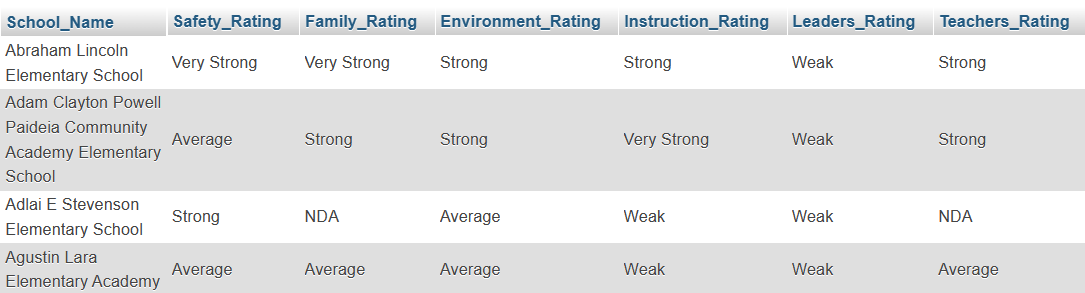

Write and execute a SQL statement that returns just the school name and leaders rating from the view.

In [ ]:
%sql SELECT School_Name, Leaders_Rating FROM CPSPRIVATE LIMIT 5

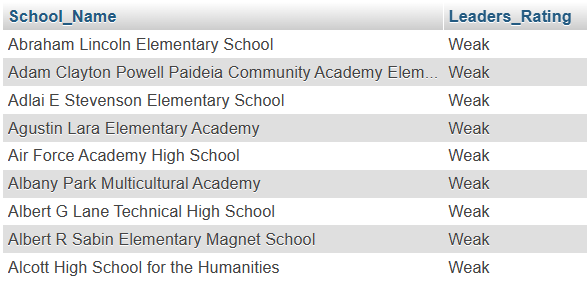

### Exercise 3: Creating a Stored Procedure
The icon fields are calculated based on the value in the corresponding score field. You need to make sure that when a score field is updated, the icon field is updated too. To do this, you will write a stored procedure that receives the school id and a leaders score as input parameters, calculates the icon setting and updates the fields appropriately.

#### Question 1
Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer.

#### Question 2
Inside your stored procedure, write a SQL statement to update the Leaders_Score field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID to the value in the in_Leader_Score parameter.

#### Question 3
Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information.
| Score lower limit | Score upper limit | Icon        |
|-------------------|-------------------|-------------|
| 80                | 99                | Very strong |
| 60                | 79                | Strong      |
| 40                | 59                | Average     |
| 20                | 39                | Weak        |
| 0                 | 19                | Very weak   |


#### Question 4
Run your code to create the stored procedure.

Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected.

### Important note for the rest of the notebook: 
The `DELIMITER` command and stored procedures (like `CREATE PROCEDURE`) are not supported in SQLite. These are features of other database systems like MySQL.

SQLite is a lightweight database and doesn't support all the features of larger SQL database systems. For complex logic like this, you would typically use a server-side language (like Python) to execute multiple SQL commands based on conditions.



In [ ]:
DELIMITER $$
CREATE PROCEDURE UPDATE_LEADERS_SCORE(IN in_School_ID INTEGER, IN in_Leader_Score INTEGER)
BEGIN
    UPDATE chicago_public_schools
    SET Leaders_Score = in_Leader_Score
    WHERE School_ID = in_School_ID;
    
    IF in_Leader_Score >= 0 AND in_Leader_Score <= 19 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Very weak'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 20 AND in_Leader_Score <= 39 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Weak'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 40 AND in_Leader_Score <= 59 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Average'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 60 AND in_Leader_Score <= 79 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Strong'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 80 AND in_Leader_Score <= 100 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Very strong'
    WHERE School_ID = in_School_ID;
    
    END IF;
END $$
DELIMITER ;

In [ ]:
# Showing the value before the procedure call    
SELECT Leaders_Icon FROM chicago_public_schools LIMIT 1

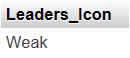

In [ ]:
# I had to include this command, because the original column values only contain
# the unique rating value "Weak" and the carchar length is set to 4 only
# So, I had to set it to 11 to accomodate other ranting values when we call the procedure
ALTER TABLE chicago_public_schools
MODIFY Leaders_Icon VARCHAR(11);

# This will update the first school in the table
CALL UPDATE_LEADERS_SCORE(610038, 50)

In [ ]:
# Showing the value before the procedure call    
SELECT Leaders_Icon FROM chicago_public_schools LIMIT 1

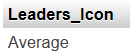

### Exercise 4: Using Transactions
You realise that if someone calls your code with a score outside of the allowed range (0-99), then the score will be updated with the invalid data and the icon will remain at its previous value. There are various ways to avoid this problem, one of which is using a transaction.

#### Question 1
Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.

#### Question 2
Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure.
Remember that as soon as any code inside the IF/ELSE IF/ELSE statements completes, processing resumes after the END IF, so you can add your commit code there.

Run your code to replace the stored procedure.

In [ ]:
DROP PROCEDURE IF EXISTS UPDATE_LEADERS_SCORE

In [ ]:
DELIMITER $$
CREATE PROCEDURE UPDATE_LEADERS_SCORE(IN in_School_ID INTEGER, IN in_Leader_Score INTEGER)
BEGIN
	
    START TRANSACTION;
    
	UPDATE chicago_public_schools
	SET Leaders_Score = in_Leader_Score
    WHERE School_ID = in_School_ID;
    
    IF in_Leader_Score >= 0 AND in_Leader_Score <= 19 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Very weak'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 20 AND in_Leader_Score <= 39 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Weak'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 40 AND in_Leader_Score <= 59 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Average'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 60 AND in_Leader_Score <= 79 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Strong'
    WHERE School_ID = in_School_ID;
    
    ELSEIF in_Leader_Score >= 80 AND in_Leader_Score <= 100 THEN
    UPDATE chicago_public_schools
    SET Leaders_Icon  = 'Very strong'
    WHERE School_ID = in_School_ID;
    
    ELSE
    ROLLBACK;
    
    END IF;
    COMMIT;
END $$
DELIMITER ;

In [ ]:
# Showing the value before the modified (with commit and rollback) procedure call    
SELECT Leaders_Icon FROM chicago_public_schools LIMIT 1

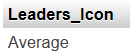

Write and run one query to check that the updated stored procedure works as expected when you use a valid score of 38.

In [ ]:
# This will update the first school in the table
CALL UPDATE_LEADERS_SCORE(610038, 38)

In [ ]:
# Showing the value after the modified (with commit and rollback) procedure call    
SELECT Leaders_Icon FROM chicago_public_schools LIMIT 1

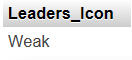

Write and run another query to check that the updated stored procedure works as expected when you use an invalid score of 101.

In [ ]:
# This will update the first school in the table
CALL UPDATE_LEADERS_SCORE(610038, 101)

In [ ]:
# Showing the value before the modified (with commit and rollback) procedure call with a score that is out of range
SELECT leaders_score, Leaders_Icon FROM chicago_public_schools LIMIT 1

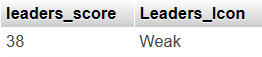
As we see, it didn't accept the update since it is out of range

## Project Completed by:
[Karim Nasr](https://www.linkedin.com/in/karim-nasr-abu-al-fath/)